In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

# Cargar los datos
file_path = '/content/ChurnData.csv'
data = pd.read_csv(file_path)

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['churn'])
y = data['churn']

# Dividir el dataset en datos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular las métricas
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar los resultados
print(f"F1-score: {f1:.2f}")
print(f"AUC ROC: {auc_roc:.2f}")
print(f"Accuracy: {accuracy:.2f}")


F1-score: 0.55
AUC ROC: 0.79
Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

churn_df = pd.read_csv('/content/ChurnData.csv')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [7]:
churn_df.info() # ver la informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [10]:
#agrupamos las variables predictoras en un arreglo de X y la variable
#dependiente en un arreglo Y de numpy

x=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:5]
y=np.asarray(churn_df['churn'])
y[0:5]

array([1., 1., 0., 0., 0.])

In [11]:
# Normalizamos todas las variables predictoras en "X" para no obtner
# resultado incongruentes. En este caso vamos a usar el Standar Score
# para normalizar.

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.5565779 ,
        -0.84846321, -0.80905935, -0.97385292, -0.5661

In [12]:
# Dividimos el dataset en datos de entranamiento y datos de evaluación.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 27) (160,)
Test set: (40, 27) (40,)


In [13]:
#Entrenamos el modelo de regresión Lineal

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
# Usemos el modelo para realizar predicciones con los datos de evaluación.
# Esto nos servirá más tarde para evaluar el modelo.

yhat = LR_model.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1.])

In [15]:
yhat_prob = LR_model.predict_proba(X_test)
yhat_prob[0:5]

array([[0.60722328, 0.39277672],
       [0.61809654, 0.38190346],
       [0.58411229, 0.41588771],
       [0.65417657, 0.34582343],
       [0.57846128, 0.42153872]])

In [16]:
# Calculemos la matriz de confusión

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2) # Establecer el número de dígitos de precisión
cnf_matrix

array([[ 7,  8],
       [ 7, 18]])

In [17]:
# Función para graficar una Matriz de Confusión

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  8]
 [ 7 18]]


Confusion matrix, without normalization
[[ 7  8]
 [ 7 18]]


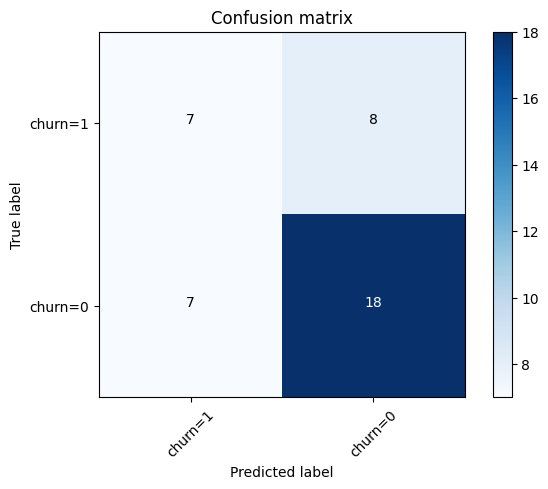

In [18]:
# Grafiquemos la matriz de confusión no normalizada

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False)

In [19]:
# Calculemos el f1 Score

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1 = f1_score(y_test, yhat)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5
Recall: 0.4666666666666667
F1 Score: 0.4827586206896552


In [20]:
# Calculemos el AUC ROC para un clasificador binario

from sklearn.metrics import roc_auc_score

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, yhat)

print("AUC-ROC:", auc_roc)

AUC-ROC: 0.5933333333333334


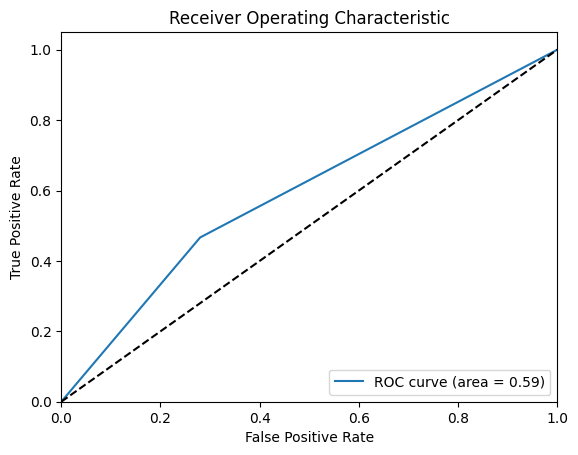

In [21]:
# Curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, yhat)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Calculemos la precisión con la librería de scikit-learn

from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test, yhat)
print(f"Accuracy: {accuracy}")

Accuracy: 0.625
